# Capstone Project

In [287]:
import os
import numpy as np
import pandas as pd
import math
import lxml.html as lh
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
import time
#import sys
#!{sys.executable} -m pip install fuzzywuzzy
from fuzzywuzzy import fuzz
os.chdir('C:\\Users\\ROHIT\\Desktop\\Capstone Project')
os.getcwd()

'C:\\Users\\ROHIT\\Desktop\\Capstone Project'

### Importing Data 

In [14]:
h_data = pd.read_csv('Hospital Beds_Data.csv') #Hospitals Data
c_data =pd.read_csv('PA County_Data.csv') #County Data
m_data =pd.read_csv('PA Municipalities_Data.csv') #Municipalities Data
p_data =pd.read_csv('Population_County.csv') #County based Population Data

In [17]:
c_data = c_data.drop(['County Code text','County Code Number','Georeferenced Latitude & Longitude'], axis =1)
c_data['County Name'] = c_data['County Name'].str.upper()
c_data = c_data.rename(columns = {'County Name':'COUNTY'})
c_data.head()

,COUNTY,Longitude,Latitude
0,ADAMS,-77.222243,39.872096
1,BERKS,-75.930773,40.419396
2,CAMBRIA,-78.718942,40.491275
3,SULLIVAN,-76.514792,41.448099
4,MERCER,-80.260094,41.302378


In [19]:
m_data['COUNTY'] = m_data['COUNTY'].str.upper()
m_data.head() #PA Municipalities Data

,COUNTY,MUNICIPALITY,CLASS
0,ADAMS,Abbottstown,Borough
1,ADAMS,Arendtsville,Borough
2,ADAMS,Bendersville,Borough
3,ADAMS,Berwick,2nd Township
4,ADAMS,Biglerville,Borough


In [30]:
m_data1 = m_data[m_data['CLASS']=='Borough']
m_data1.head()

,COUNTY,MUNICIPALITY,CLASS
0,ADAMS,Abbottstown,Borough
1,ADAMS,Arendtsville,Borough
2,ADAMS,Bendersville,Borough
4,ADAMS,Biglerville,Borough
5,ADAMS,Bonneauville,Borough
7,ADAMS,Carroll Valley,Borough
10,ADAMS,East Berlin,Borough
11,ADAMS,Fairfield,Borough
15,ADAMS,Gettysburg,Borough
22,ADAMS,Littlestown,Borough


In [5]:
h_data.head() #Hospital Beds Data

,COUNTY,FACILITY NAME,LICENSED BEDS
0,ADAMS,GETTYSBURG HOSPITAL,76
1,ALLEGHENY,ALLEGHENY GENERAL HOSPITAL,552
2,ALLEGHENY,ALLEGHENY VALLEY HOSPITAL,190
3,ALLEGHENY,FORBES HOSPITAL,315
4,ALLEGHENY,HERITAGE VALLEY SEWICKLEY,176


In [21]:
p_data['County'] = p_data['County'].str.upper()
p_data = p_data.rename(columns = {'County':'COUNTY'})
p_data.head()

,COUNTY,Population
0,PHILADELPHIA,1584138
1,ALLEGHENY,1218452
2,MONTGOMERY,828604
3,BUCKS,628195
4,DELAWARE,564751


In [31]:
## Determining Latitude and Longitude information about PA Municipalities
#import sys
#!{sys.executable} -m pip install opencage
from opencage.geocoder import OpenCageGeocode

key = 'd79a6821735b4ac4bebac7effe6c875f' # API Key
geocoder = OpenCageGeocode(key)


list_lat = []   # create empty lists
list_long = []


for index, row in m_data1.iterrows(): # iterate over rows in dataframe
    City = row['MUNICIPALITY']
    State = row['COUNTY']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

m_data1['lat'] = list_lat   
m_data1['lon'] = list_long

C:\Users\ROHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ROHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [95]:
m_data1 = m_data1.drop(columns=['CLASS'])
m_data1['MUNICIPALITY'] = m_data1['MUNICIPALITY'].str.upper()
m_data1.head()

,COUNTY,MUNICIPALITY,lat,lon
0,ADAMS,ABBOTTSTOWN,39.886487,-76.984701
1,ADAMS,ARENDTSVILLE,39.923149,-77.298596
2,ADAMS,BENDERSVILLE,39.982593,-77.249428
4,ADAMS,BIGLERVILLE,39.930378,-77.248271
5,ADAMS,BONNEAUVILLE,39.812042,-77.137205


### Web Scraping

In [69]:
URL = 'https://en.wikipedia.org/wiki/List_of_municipalities_in_Pennsylvania'
page = requests.get(URL)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [70]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [71]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d: %s'%(i,name))
    col.append((name,[]))

1: Rank(pop.)

2: Municipality

3: County

4: 2018 pop. est.

5: Area[1](mi2)

6: Pop. dens.(p/mi2)



In [72]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 6, the //tr data is not from our table 
    if len(T)!=6:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content()
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [73]:
[len(C) for (title,C) in col]

[2560, 2560, 2560, 2560, 2560, 2560]

In [80]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df.head()

,Rank(pop.),Municipality,County,2018 pop. est.,Area[1](mi2),Pop. dens.(p/mi2)
0,1,Philadelphia city†,Philadelphia,"1,583,466",142.7,10844.6\n
1,2,Pittsburgh city†,Allegheny,"302,571",58.3,5248.9\n
2,3,Allentown city†,Lehigh,"120,977",18.0,6600.9\n
3,4,Erie city†,Erie,"97,176",19.3,5241.3\n
4,5,Reading city†,Berks,"89,978",10.1,8689.4\n


In [81]:
df = df.replace(r'\n','', regex=True)
df = df.replace(r'†','',regex=True)
df['County\n'] = df['County\n'].str.upper()
df = df.rename(columns = {'County\n':'COUNTY','2018 pop. est.\n':'Pop'})
df.head()

,Rank(pop.),Municipality,COUNTY,Pop,Area[1](mi2),Pop. dens.(p/mi2)
0,1,Philadelphia city,PHILADELPHIA,"1,583,466",142.7,10844.6
1,2,Pittsburgh city,ALLEGHENY,"302,571",58.3,5248.9
2,3,Allentown city,LEHIGH,"120,977",18.0,6600.9
3,4,Erie city,ERIE,"97,176",19.3,5241.3
4,5,Reading city,BERKS,"89,978",10.1,8689.4


In [82]:
#df = df.drop(['Rank(pop.)\n'])
new = df["Municipality\n"].str.split(" ", n = 1, expand = True)
# making separate MUNICIPALITY column from new data frame 
df["MUNICIPALITY"]= new[0] 
  
# making separate last name column from new data frame 
df["Type"]= new[1] 
  
# Dropping old columns 
df.drop(columns =["Municipality\n"], inplace = True) 
  
# df display 
df.head()

,Rank(pop.),COUNTY,Pop,Area[1](mi2),Pop. dens.(p/mi2),MUNICIPALITY,Type
0,1,PHILADELPHIA,"1,583,466",142.7,10844.6,Philadelphia,city
1,2,ALLEGHENY,"302,571",58.3,5248.9,Pittsburgh,city
2,3,LEHIGH,"120,977",18.0,6600.9,Allentown,city
3,4,ERIE,"97,176",19.3,5241.3,Erie,city
4,5,BERKS,"89,978",10.1,8689.4,Reading,city
5,6,DELAWARE,"83,566",7.8,10578.8,Upper,Darby Township
6,7,LACKAWANNA,"79,166",25.5,2968.5,Scranton,city
7,8,"NORTHAMPTON, LEHIGH","77,755",19.5,3861.1,Bethlehem,city
8,9,BUCKS,"66,326",20.9,2890.4,Bensalem,Township
9,10,LANCASTER,"59,698",7.4,8071.8,Lancaster,city


In [89]:
df1 = df[df['Type']=='borough']
df1['MUNICIPALITY'] = df1['MUNICIPALITY'].str.upper()
df1 = df1.drop(columns = ['Type','Rank(pop.)\n'])
df1.head()

C:\Users\ROHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,COUNTY,Pop,Area[1](mi2),Pop. dens.(p/mi2),MUNICIPALITY
27,MONTGOMERY,"34,427",3.6,9541.9,NORRISTOWN
45,ALLEGHENY,"28,386",19.7,1437.6,MONROEVILLE
48,ALLEGHENY,"27,395",29.0,946.0,PLUM
73,MONTGOMERY,"22,480",5.0,4528.6,POTTSTOWN
82,FRANKLIN,"20,360",6.9,2940.1,CHAMBERSBURG


In [338]:
m_data2 = m_data1.merge(df1,on=['MUNICIPALITY','COUNTY'], how = 'inner')
m_data2.head()

,COUNTY,MUNICIPALITY,lat,lon,Pop,Area[1](mi2),Pop. dens.(p/mi2)
0,ADAMS,ARENDTSVILLE,39.923149,-77.298596,941,0.8,1150.4
1,ADAMS,BENDERSVILLE,39.982593,-77.249428,640,0.5,1415.9
2,ADAMS,BIGLERVILLE,39.930378,-77.248271,"1,207",0.7,1848.4
3,ADAMS,BONNEAUVILLE,39.812042,-77.137205,"1,804",1.0,1867.5
4,ADAMS,FAIRFIELD,39.787317,-77.368598,506,0.7,754.1


In [340]:
m_data3 = m_data2[['COUNTY','MUNICIPALITY','Pop','lat','lon']]
m_data3.head()

,COUNTY,MUNICIPALITY,Pop,lat,lon
0,ADAMS,ARENDTSVILLE,941,39.923149,-77.298596
1,ADAMS,BENDERSVILLE,640,39.982593,-77.249428
2,ADAMS,BIGLERVILLE,"1,207",39.930378,-77.248271
3,ADAMS,BONNEAUVILLE,"1,804",39.812042,-77.137205
4,ADAMS,FAIRFIELD,506,39.787317,-77.368598


[Text(0, 0, 'ADAMS'),
 Text(0, 0, 'ALLEGHENY'),
 Text(0, 0, 'ARMSTRONG'),
 Text(0, 0, 'BEAVER'),
 Text(0, 0, 'BEDFORD'),
 Text(0, 0, 'BERKS'),
 Text(0, 0, 'BLAIR'),
 Text(0, 0, 'BRADFORD'),
 Text(0, 0, 'BUCKS'),
 Text(0, 0, 'BUTLER'),
 Text(0, 0, 'CAMBRIA'),
 Text(0, 0, 'CAMERON'),
 Text(0, 0, 'CARBON'),
 Text(0, 0, 'CENTRE'),
 Text(0, 0, 'CHESTER'),
 Text(0, 0, 'CLARION'),
 Text(0, 0, 'CLEARFIELD'),
 Text(0, 0, 'CLINTON'),
 Text(0, 0, 'COLUMBIA'),
 Text(0, 0, 'CRAWFORD'),
 Text(0, 0, 'CUMBERLAND'),
 Text(0, 0, 'DAUPHIN'),
 Text(0, 0, 'DELAWARE'),
 Text(0, 0, 'ELK'),
 Text(0, 0, 'ERIE'),
 Text(0, 0, 'FAYETTE'),
 Text(0, 0, 'FOREST'),
 Text(0, 0, 'FRANKLIN'),
 Text(0, 0, 'FULTON'),
 Text(0, 0, 'GREENE'),
 Text(0, 0, 'HUNTINGDON'),
 Text(0, 0, 'INDIANA'),
 Text(0, 0, 'JEFFERSON'),
 Text(0, 0, 'JUNIATA'),
 Text(0, 0, 'LACKAWANNA'),
 Text(0, 0, 'LANCASTER'),
 Text(0, 0, 'LAWRENCE'),
 Text(0, 0, 'LEBANON'),
 Text(0, 0, 'LEHIGH'),
 Text(0, 0, 'LUZERNE'),
 Text(0, 0, 'LYCOMING'),
 Text(0, 0, 

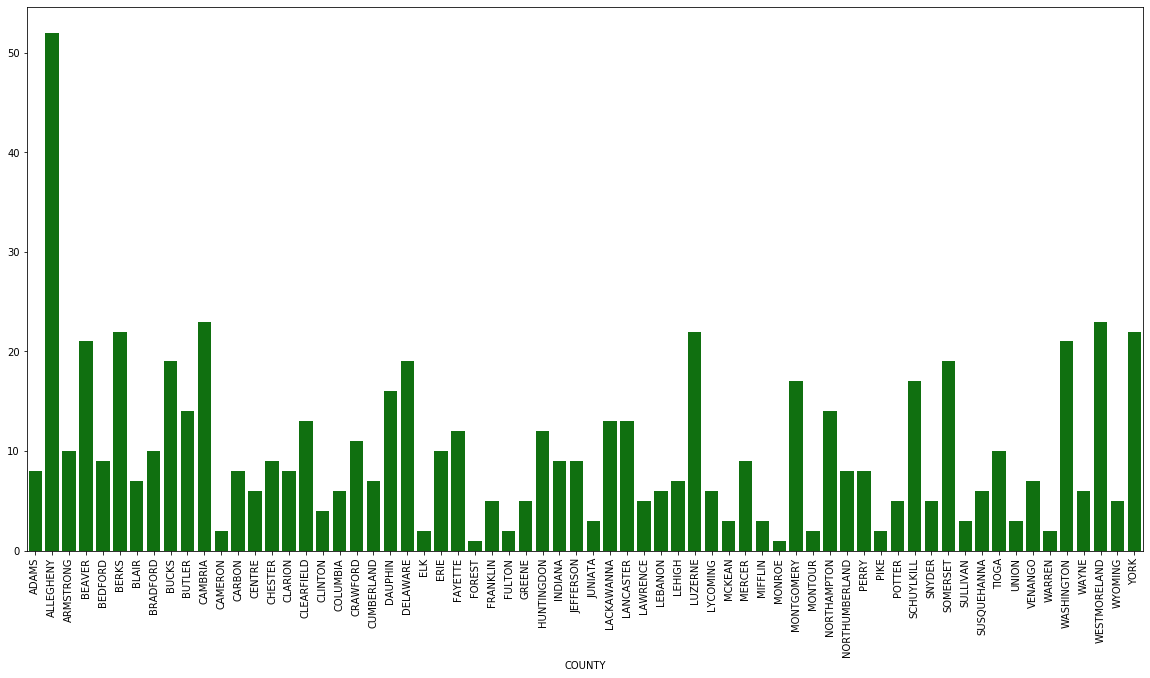

In [341]:
m_data4 = m_data3.groupby('COUNTY')['MUNICIPALITY'].count()
plt.figure(figsize=(20,10))
chart = sns.barplot(x = m_data4.index, y = m_data4.values, color = 'green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'PHILADELPHIA'),
 Text(0, 0, 'ALLEGHENY'),
 Text(0, 0, 'MONTGOMERY'),
 Text(0, 0, 'BUCKS'),
 Text(0, 0, 'DELAWARE'),
 Text(0, 0, 'LANCASTER'),
 Text(0, 0, 'CHESTER'),
 Text(0, 0, 'YORK'),
 Text(0, 0, 'BERKS'),
 Text(0, 0, 'LEHIGH'),
 Text(0, 0, 'WESTMORELAND'),
 Text(0, 0, 'LUZERNE'),
 Text(0, 0, 'NORTHAMPTON'),
 Text(0, 0, 'DAUPHIN'),
 Text(0, 0, 'ERIE'),
 Text(0, 0, 'CUMBERLAND'),
 Text(0, 0, 'LACKAWANNA'),
 Text(0, 0, 'WASHINGTON'),
 Text(0, 0, 'BUTLER'),
 Text(0, 0, 'MONROE'),
 Text(0, 0, 'BEAVER'),
 Text(0, 0, 'CENTRE'),
 Text(0, 0, 'FRANKLIN'),
 Text(0, 0, 'SCHUYLKILL'),
 Text(0, 0, 'LEBANON'),
 Text(0, 0, 'CAMBRIA'),
 Text(0, 0, 'FAYETTE'),
 Text(0, 0, 'BLAIR'),
 Text(0, 0, 'LYCOMING'),
 Text(0, 0, 'MERCER'),
 Text(0, 0, 'ADAMS'),
 Text(0, 0, 'NORTHUMBERLAND'),
 Text(0, 0, 'LAWRENCE'),
 Text(0, 0, 'CRAWFORD'),
 Text(0, 0, 'INDIANA'),
 Text(0, 0, 'CLEARFIELD'),
 Text(0, 0, 'SOMERSET'),
 Text(0, 0, 'COLUMBIA'),
 Text(0, 0, 'ARMSTRONG'),
 Text(0, 0, 'CARBON'),
 Text(0, 

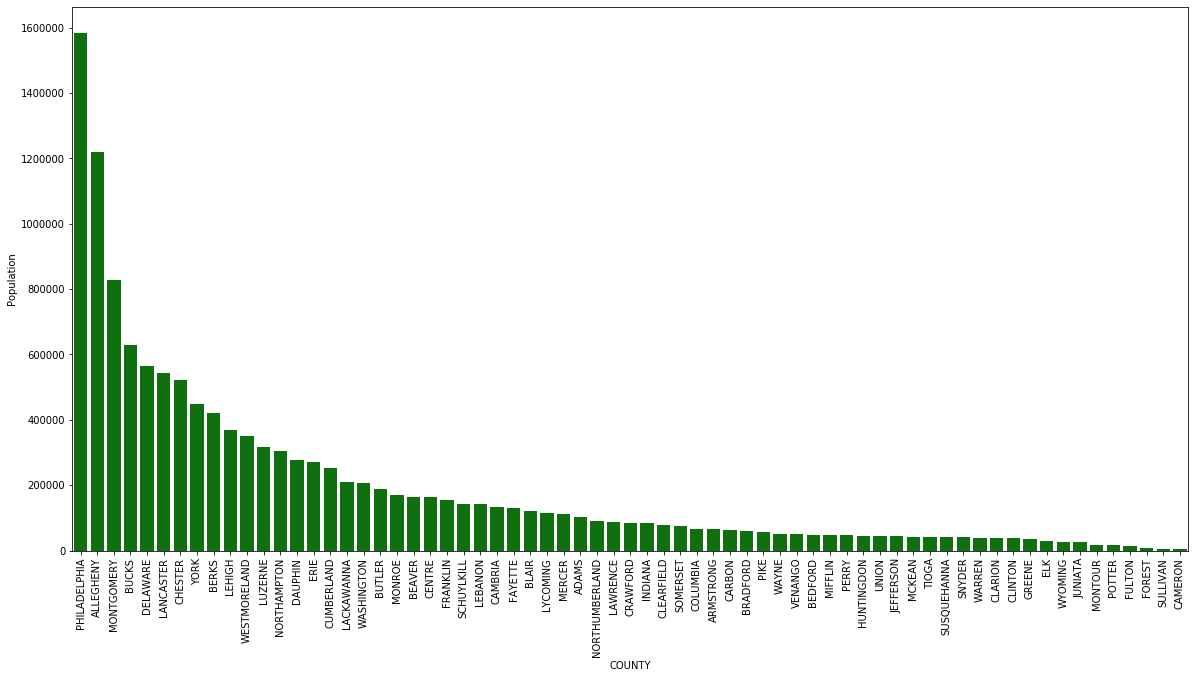

In [342]:
plt.figure(figsize=(20,10))
chart = sns.barplot(x = p_data['COUNTY'], y = p_data['Population'], color = 'green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [343]:
# Now, let us fetch hospital information for each Municipality
def get_hospital_data(lat, lng, MUNICIPALITY,COUNTY):
    """
    We are going to utilize foursquare API to fetch hospital data. It will take latitude,     longitude and return hospital information.
    """
    radius = 1000
    LIMIT = 100
    VERSION = '20200328'
    FS_CLIENT_ID = "A5S2CJNU43XNBJEADGVEDLOR024ZP5BC5KZY2E1F0WT0DZEI"
    FS_CLIENT_SECRET = "GIPWZSDNB1GYTVSRWTFV2E2JZBHBDYCORNL3MVRVDUOWQADI"
    FS_HOSPITAL_KEY = "4bf58dd8d48988d196941735"
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        FS_CLIENT_ID,
        FS_CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT,
        FS_HOSPITAL_KEY)
    response = requests.get(url)
    if not response.status_code == 200:
        print("ERROR", response.status_code, response.content)
        return None
    results = response.json()
    venue_data = results["response"]["venues"]
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['id']
            venue_name = row['name']
            lat = row["location"]["lat"]
            lng = row["location"]["lng"]
            venue_details.append(
                [venue_id, venue_name, lat, lng, MUNICIPALITY, COUNTY])
        except KeyError:
            pass

    column_names = ['ID', 'Name', 'Latitude',
                    'Longitude', "MUNICIPALITY", "COUNTY"]
    df = pd.DataFrame(venue_details, columns=column_names)
    return df

In [344]:
# Let us also write another function to utilize the nyc_df to get hospital data
def get_hospital_per_borough_county(df):
    """
    It will utilize m_data3 and get hospital per neighborhood.
    """
    column_names = ['ID', 'Name', 'Latitude',
                    'Longitude', "MUNICIPALITY", "COUNTY"]
    data = []
    for i, row in df.iterrows():
        h_df = get_hospital_data(
            row["lat"], row["lon"], row["MUNICIPALITY"], row["COUNTY"])
        if h_df is not None:
            for x, hrow in h_df.iterrows():
                data.append([hrow[column] for column in column_names])

    n_df = pd.DataFrame(data, columns=column_names)
    n_df.to_csv('hospital_per_boro_nei.csv')
    return n_df

In [345]:
# Now let us use the above function
hospital_df = get_hospital_per_borough_county(m_data3)
hospital_df.head()

,ID,Name,Latitude,Longitude,MUNICIPALITY,COUNTY
0,59b1545b79f6c733be83a7c7,Gettysburg Hospital,39.825022,-77.234436,GETTYSBURG,ADAMS
1,4ba6494bf964a520904239e3,WellSpan Gettysburg Hospital: Emergency Room,39.824420,-77.234929,GETTYSBURG,ADAMS
2,4e568e3c7d8b60849c50fe36,Transitions Health Care,39.840539,-77.229855,GETTYSBURG,ADAMS
3,50ec5f65e4b0d785bc62494a,C113,39.824442,-77.235076,GETTYSBURG,ADAMS
4,4bfbdc84d0382d7f9e28ca0a,MedExpress Urgent Care,40.491290,-79.907848,ASPINWALL,ALLEGHENY


In [346]:
hospital_df['Name'] = hospital_df['Name'].str.upper()
hospital_df = hospital_df.rename(columns = {'Name':'FACILITY NAME'})
hospital_df.head()

,ID,FACILITY NAME,Latitude,Longitude,MUNICIPALITY,COUNTY
0,59b1545b79f6c733be83a7c7,GETTYSBURG HOSPITAL,39.825022,-77.234436,GETTYSBURG,ADAMS
1,4ba6494bf964a520904239e3,WELLSPAN GETTYSBURG HOSPITAL: EMERGENCY ROOM,39.824420,-77.234929,GETTYSBURG,ADAMS
2,4e568e3c7d8b60849c50fe36,TRANSITIONS HEALTH CARE,39.840539,-77.229855,GETTYSBURG,ADAMS
3,50ec5f65e4b0d785bc62494a,C113,39.824442,-77.235076,GETTYSBURG,ADAMS
4,4bfbdc84d0382d7f9e28ca0a,MEDEXPRESS URGENT CARE,40.491290,-79.907848,ASPINWALL,ALLEGHENY


In [348]:
# Now let us combine hospital ber neighborhood data with hospital bed data
def combine_hospital_beds_with_COUNTY_municipality(hospital_df, hospital_boro_nei_df):
    # Uses fuzzywuzzy to match hospital name from Foursquare to PA Hospital Data
    data = []
    column_names = ["FACILITY NAME", "LICENSED BEDS"]
    boro_neig_column_names = ["COUNTY", "MUNICIPALITY"]
    for i, row in hospital_df.iterrows():
        data_per_hospital = None
        max_ratio = 0
        for x, hrow in hospital_boro_nei_df.iterrows():
            ratio = fuzz.token_sort_ratio(row["FACILITY NAME"], hrow["FACILITY NAME"])
            if ratio > max_ratio:
                max_ratio = ratio
                data_per_hospital = [
                    row[column] for column in column_names] + \
                    [hrow[column] for column in boro_neig_column_names
                     ]
        if data_per_hospital:
            data.append(data_per_hospital)

    df = pd.DataFrame(data, columns=column_names+boro_neig_column_names)
    df.to_csv('cleaned_hospital_data.csv')
    return df

In [349]:
h_df = combine_hospital_beds_with_COUNTY_municipality(h_data, hospital_df)
h_df.head()

,FACILITY NAME,LICENSED BEDS,COUNTY,MUNICIPALITY
0,GETTYSBURG HOSPITAL,76,ADAMS,GETTYSBURG
1,ALLEGHENY GENERAL HOSPITAL,552,ALLEGHENY,AVALON
2,ALLEGHENY VALLEY HOSPITAL,190,ALLEGHENY,TARENTUM
3,FORBES HOSPITAL,315,LUZERNE,KINGSTON
4,HERITAGE VALLEY SEWICKLEY,176,ALLEGHENY,SEWICKLEY


In [350]:
h_data4 = h_df[['COUNTY','MUNICIPALITY','LICENSED BEDS']]
h_data4.head()

,COUNTY,MUNICIPALITY,LICENSED BEDS
0,ADAMS,GETTYSBURG,76
1,ALLEGHENY,AVALON,552
2,ALLEGHENY,TARENTUM,190
3,LUZERNE,KINGSTON,315
4,ALLEGHENY,SEWICKLEY,176


In [395]:
h_data4.shape

(71, 3)

In [351]:
h_data4 = h_data4.replace(r',','',regex=True)
h_data4= h_data4[h_data4['LICENSED BEDS'] != '.']
h_data4['LICENSED BEDS'] = h_data4['LICENSED BEDS'].astype(int)

In [353]:
h_data4 = h_data4.groupby(('COUNTY','MUNICIPALITY'))['LICENSED BEDS'].sum().reset_index()

C:\Users\ROHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [383]:
h_data4.head()

,COUNTY,MUNICIPALITY,LICENSED BEDS
0,ADAMS,GETTYSBURG,528
1,ALLEGHENY,ASPINWALL,1365
2,ALLEGHENY,AVALON,833
3,ALLEGHENY,BELLEVUE,1172
4,ALLEGHENY,BRADDOCK,171


[Text(0, 0, 'ASHLEY'),
 Text(0, 0, 'ASPINWALL'),
 Text(0, 0, 'AVALON'),
 Text(0, 0, 'BEDFORD'),
 Text(0, 0, 'BELLEVUE'),
 Text(0, 0, 'BLAKELY'),
 Text(0, 0, 'BRADDOCK'),
 Text(0, 0, 'BRENTWOOD'),
 Text(0, 0, 'BRIDGEVILLE'),
 Text(0, 0, 'BRIDGEWATER'),
 Text(0, 0, 'BROOKVILLE'),
 Text(0, 0, 'CARLISLE'),
 Text(0, 0, 'CLEARFIELD'),
 Text(0, 0, 'COALDALE'),
 Text(0, 0, 'CONSHOHOCKEN'),
 Text(0, 0, 'DALE'),
 Text(0, 0, 'DANVILLE'),
 Text(0, 0, 'DARBY'),
 Text(0, 0, 'DOWNINGTOWN'),
 Text(0, 0, 'DOYLESTOWN'),
 Text(0, 0, 'DUNMORE'),
 Text(0, 0, 'EDGEWORTH'),
 Text(0, 0, 'EPHRATA'),
 Text(0, 0, 'FLEMINGTON'),
 Text(0, 0, 'GETTYSBURG'),
 Text(0, 0, 'HANOVER'),
 Text(0, 0, 'HASTINGS'),
 Text(0, 0, 'HEIDELBERG'),
 Text(0, 0, 'HONESDALE'),
 Text(0, 0, 'HUMMELSTOWN'),
 Text(0, 0, 'HUNTINGDON'),
 Text(0, 0, 'JEFFERSON'),
 Text(0, 0, 'JENKINTOWN'),
 Text(0, 0, 'KANE'),
 Text(0, 0, 'KINGSTON'),
 Text(0, 0, 'KITTANNING'),
 Text(0, 0, 'LANSDALE'),
 Text(0, 0, 'MECHANICSVILLE'),
 Text(0, 0, 'MEYERSDALE')

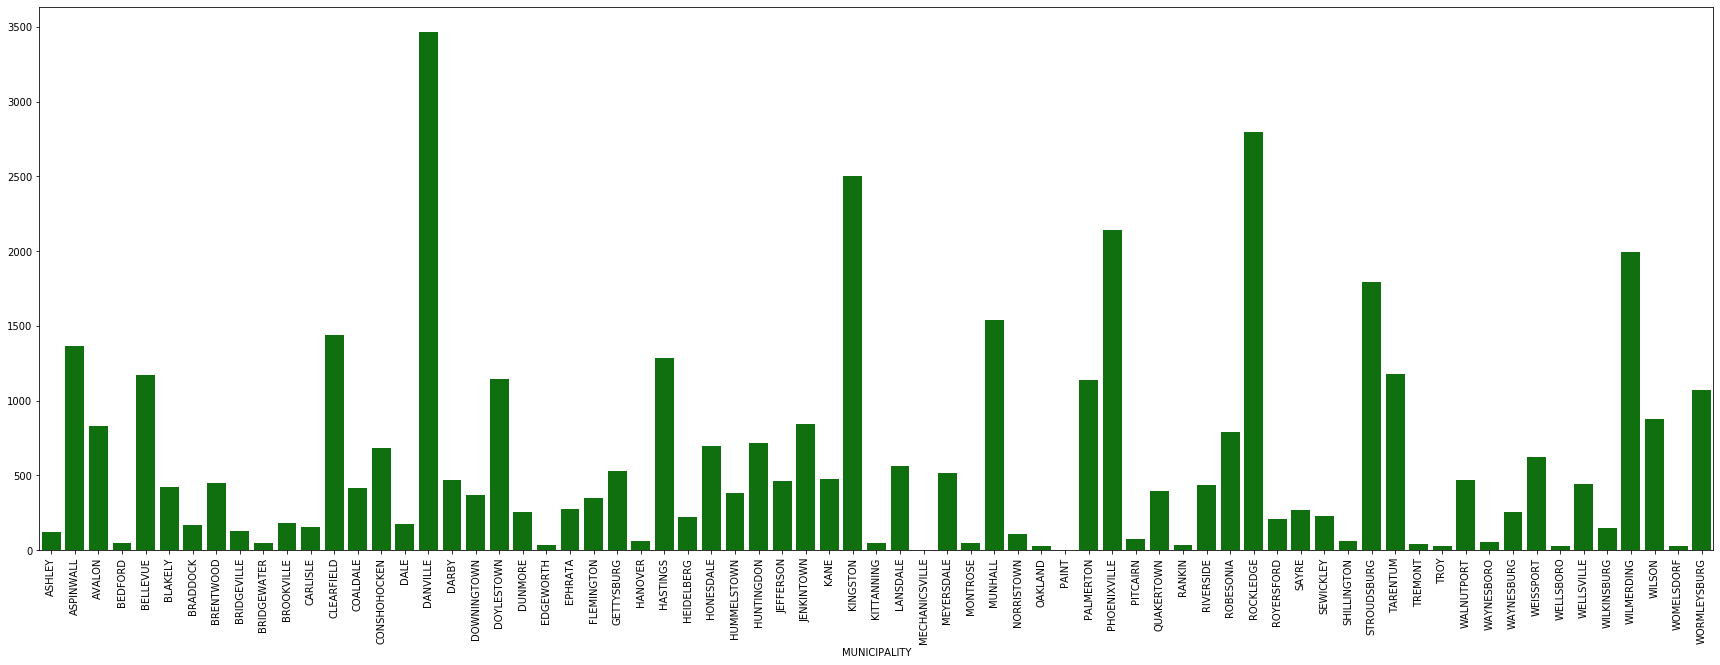

In [355]:
plt.figure(figsize = (30,10))
h_data5 =h_data4.groupby('MUNICIPALITY')['LICENSED BEDS'].sum()
chart = sns.barplot(x=h_data5.index, y= h_data5.values, color ='green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'ADAMS'),
 Text(0, 0, 'ALLEGHENY'),
 Text(0, 0, 'ARMSTRONG'),
 Text(0, 0, 'BEAVER'),
 Text(0, 0, 'BEDFORD'),
 Text(0, 0, 'BERKS'),
 Text(0, 0, 'BRADFORD'),
 Text(0, 0, 'BUCKS'),
 Text(0, 0, 'CAMBRIA'),
 Text(0, 0, 'CARBON'),
 Text(0, 0, 'CHESTER'),
 Text(0, 0, 'CLEARFIELD'),
 Text(0, 0, 'CLINTON'),
 Text(0, 0, 'CUMBERLAND'),
 Text(0, 0, 'DAUPHIN'),
 Text(0, 0, 'DELAWARE'),
 Text(0, 0, 'FRANKLIN'),
 Text(0, 0, 'GREENE'),
 Text(0, 0, 'HUNTINGDON'),
 Text(0, 0, 'JEFFERSON'),
 Text(0, 0, 'LACKAWANNA'),
 Text(0, 0, 'LANCASTER'),
 Text(0, 0, 'LUZERNE'),
 Text(0, 0, 'MCKEAN'),
 Text(0, 0, 'MONROE'),
 Text(0, 0, 'MONTGOMERY'),
 Text(0, 0, 'MONTOUR'),
 Text(0, 0, 'NORTHAMPTON'),
 Text(0, 0, 'NORTHUMBERLAND'),
 Text(0, 0, 'SCHUYLKILL'),
 Text(0, 0, 'SOMERSET'),
 Text(0, 0, 'SUSQUEHANNA'),
 Text(0, 0, 'TIOGA'),
 Text(0, 0, 'WAYNE'),
 Text(0, 0, 'YORK')]

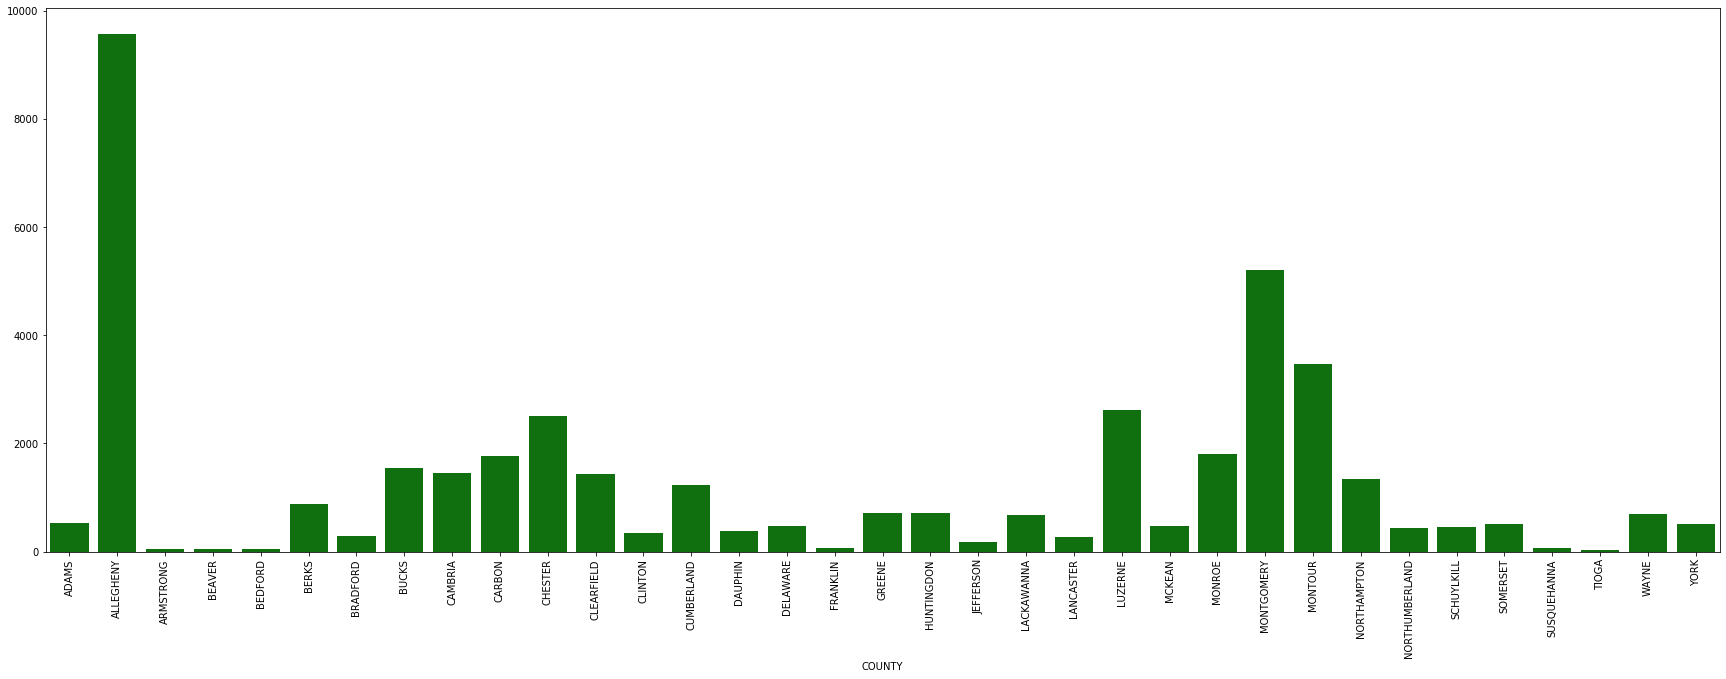

In [356]:
plt.figure(figsize = (30,10))
h_data5 =h_data4.groupby('COUNTY')['LICENSED BEDS'].sum()
chart = sns.barplot(x=h_data5.index, y= h_data5.values, color ='green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [361]:
m_data2 = m_data3
h_data6 = h_data4.merge(m_data2, on = ['COUNTY','MUNICIPALITY'], how = 'inner')
h_data6 = h_data6.replace(r',','',regex=True)
h_data6['Pop'] = h_data6['Pop'].astype(int)
h_data6.head()

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon
0,ADAMS,GETTYSBURG,528,7645,39.830897,-77.231012
1,ALLEGHENY,ASPINWALL,1365,2797,40.491242,-79.903510
2,ALLEGHENY,AVALON,833,4695,40.500902,-80.067555
3,ALLEGHENY,BELLEVUE,1172,8352,40.493958,-80.051722
4,ALLEGHENY,BRADDOCK,171,2153,40.403402,-79.868382


In [362]:
h_data6[h_data6['MUNICIPALITY'] == "COALDALE"]

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon
60,SCHUYLKILL,COALDALE,419,2248,40.82496,-75.908517


In [363]:
h_data6['BEDS PER 100 PEOPLE'] = (h_data6['LICENSED BEDS']/h_data6['Pop'])*100
h_data6.head()

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon,BEDS PER 100 PEOPLE
0,ADAMS,GETTYSBURG,528,7645,39.830897,-77.231012,6.906475
1,ALLEGHENY,ASPINWALL,1365,2797,40.491242,-79.903510,48.802288
2,ALLEGHENY,AVALON,833,4695,40.500902,-80.067555,17.742279
3,ALLEGHENY,BELLEVUE,1172,8352,40.493958,-80.051722,14.032567
4,ALLEGHENY,BRADDOCK,171,2153,40.403402,-79.868382,7.942406


### K-Means Clustering 

In [364]:
# Now we are going to use k-means clustering to partition data in k partitions
# We are going to use elbow method to find the optimum number of cluster

def plot_kmeans(dataset):
    obs = dataset.copy()
    silhouette_score_values = list()
    number_of_clusters = range(3, 30)
    for i in number_of_clusters:
        classifier = KMeans(i, init='k-means++', n_init=10,
                            max_iter=300, tol=0.0001, random_state=10)
        classifier.fit(obs)
        labels = classifier.predict(obs)
        silhouette_score_values.append(sklearn.metrics.silhouette_score(
            obs, labels, metric='euclidean', random_state=0))

    plt.plot(number_of_clusters, silhouette_score_values)
    plt.title("Silhouette score values vs Numbers of Clusters ")
    plt.show()

    optimum_number_of_components = number_of_clusters[silhouette_score_values.index(
        max(silhouette_score_values))]
    print("Optimal number of components is:")
    print(optimum_number_of_components)

#### Normalizing Data

In [365]:
cl_data = h_data6[['Pop','BEDS PER 100 PEOPLE']]
# Normalizing data
cl_data = sklearn.preprocessing.StandardScaler().fit_transform(cl_data)
cl_data

array([[ 0.32780719, -0.39129737],
       [-0.52751314,  0.71455433],
       [-0.19265382, -0.10528329],
       [ 0.45254141, -0.20320218],
       [-0.64113243, -0.36395368],
       [ 0.67625143, -0.45122258],
       [-0.11379074, -0.50891649],
       [-0.72440619, -0.52334889],
       [-0.80132856, -0.09869268],
       [ 0.98676377, -0.21593735],
       [-0.44124011, -0.51254758],
       [-0.64713096, -0.52999803],
       [-0.34685142, -0.41747602],
       [-0.2233522 ,  0.11591602],
       [ 1.78527446, -0.54920173],
       [-0.63548675,  1.83520005],
       [-0.31879945, -0.541099  ],
       [-0.89677582, -0.38612923],
       [-0.52839528, -0.52632622],
       [-0.65577591,  0.43376037],
       [-0.09279588, -0.54349274],
       [-0.52398459, -0.54829671],
       [-0.04057335, -0.44677296],
       [-0.78915507, -0.52337637],
       [ 0.45483497, -0.21135086],
       [ 0.55928003, -0.45778299],
       [-0.80750353, -0.19184579],
       [-0.79903501,  2.11838708],
       [-0.07233029,

#### Elbow Method to determine best K

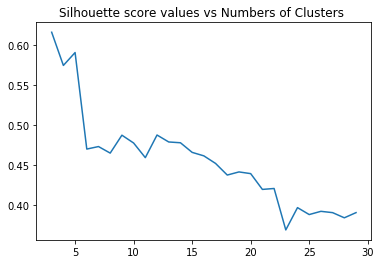

Optimal number of components is:
3


In [366]:
# Performing k-means clustering
plot_kmeans(cl_data)

### Clustering Based on Optimal K value

In [367]:
#Optimum k = 3
k_clusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cl_data)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1])

In [368]:
h_data6['Cluster'] = kmeans.labels_
h_data6.head()

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon,BEDS PER 100 PEOPLE,Cluster
0,ADAMS,GETTYSBURG,528,7645,39.830897,-77.231012,6.906475,2
1,ALLEGHENY,ASPINWALL,1365,2797,40.491242,-79.903510,48.802288,2
2,ALLEGHENY,AVALON,833,4695,40.500902,-80.067555,17.742279,2
3,ALLEGHENY,BELLEVUE,1172,8352,40.493958,-80.051722,14.032567,2
4,ALLEGHENY,BRADDOCK,171,2153,40.403402,-79.868382,7.942406,2


### Graphical Visualizations

In [369]:
def get_location(query):
    """
    This function will return lattitude and longitude of an given address
    """
    geocoder = OpenCageGeocode(key)
    results = geocoder.geocode(query)   
    
    if results:
        lat = results[0]['geometry']['lat']
        long = results[0]['geometry']['lng']
        return [lat, long]
    return [None, None]

In [370]:
def save_map(m, filepath='map.html'):
    m.save(filepath)

def render_map_clusters(h_data6, cl_data, bpp_df=cl_data[:, 1],kclusters=3, m_boost=5, add_boost=5):
    """
    This function will render map for dataframe using folium
    """
    map_clusters = folium.Map(
        location=get_location("Pennsylvania"), zoom_start=11)
    colours = ['red', 'green', 'blue']
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    markers_colors = []
    for lat, lon, poi, nei, cluster, bed_per_people in zip(h_data6['lat'],h_data6['lon'], h_data6['MUNICIPALITY'], h_data6["COUNTY"], h_data6['Cluster'], bpp_df):
        label = folium.Popup(
            ' Cluster ' + str(cluster)+': ' + str(poi) + "-" + str(nei),
            parse_html=True
        )
        folium.CircleMarker(
            [lat, lon],
            radius=bed_per_people*m_boost+add_boost,
            popup=label,
            color=colours[cluster],
            fill=True,
            fill_color=colours[cluster],
            fill_opacity=0.7).add_to(map_clusters)
    return map_clusters

In [371]:
# Now let us render the map
map_clusters = render_map_clusters(h_data6, cl_data)
map_clusters
save_map(map_clusters)

In [372]:
# Now let us render the map for bed per 100 people
map_clusters = render_map_clusters(h_data6, cl_data,h_data6['BEDS PER 100 PEOPLE'],m_boost=1,add_boost=5)
map_clusters
save_map(map_clusters, 'bed_per_hundred.html')

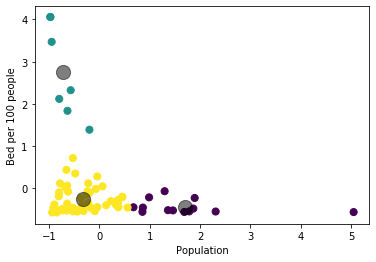

In [373]:
# Now we are going to use scatter plot to show the centroids
y_kmeans = kmeans.predict(cl_data)
plt.scatter(cl_data[:, 0], cl_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Bed per 100 people')
plt.show()

### Cluster Analysis

In [374]:
h_data6[(h_data6['Cluster'] == 0)]

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon,BEDS PER 100 PEOPLE,Cluster
5,ALLEGHENY,BRENTWOOD,446,9620,40.373269,-79.975621,4.636175,0
9,ALLEGHENY,MUNHALL,1542,11380,40.392291,-79.900050,13.550088,0
14,ALLEGHENY,WILKINSBURG,147,15906,40.441736,-79.881994,0.924180,0
31,CHESTER,PHOENIXVILLE,2143,16518,40.130382,-75.514913,12.973726,0
34,CUMBERLAND,CARLISLE,153,18880,40.201499,-77.189078,0.810381,0
37,DELAWARE,DARBY,466,10682,39.918446,-75.259072,4.362479,0
38,FRANKLIN,WAYNESBORO,57,10633,39.755783,-77.577651,0.536067,0
44,LACKAWANNA,DUNMORE,254,14069,41.419803,-75.632411,1.805388,0
45,LANCASTER,EPHRATA,273,13506,40.179911,-76.178924,2.021324,0
47,LUZERNE,KINGSTON,2502,13131,41.261748,-75.896863,19.054147,0


In [375]:
h_data6[(h_data6['Cluster'] == 1)]

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon,BEDS PER 100 PEOPLE,Cluster
15,ALLEGHENY,WILMERDING,1994,2185,40.390902,-79.810047,91.258581,1
27,CAMBRIA,HASTINGS,1283,1258,40.665067,-78.712248,101.987281,1
29,CARBON,WEISSPORT,622,406,40.828992,-75.698547,153.201970,1
39,GREENE,JEFFERSON,460,262,42.015261,-94.377468,175.572519,1
54,MONTGOMERY,ROCKLEDGE,2799,2550,40.081222,-75.089618,109.764706,1
56,MONTOUR,DANVILLE,3462,4661,40.966481,-76.613147,74.275906,1
70,YORK,WELLSVILLE,444,253,42.122012,-77.948058,175.494071,1


In [376]:
h_data6[(h_data6['Cluster'] == 2)]

,COUNTY,MUNICIPALITY,LICENSED BEDS,Pop,lat,lon,BEDS PER 100 PEOPLE,Cluster
0,ADAMS,GETTYSBURG,528,7645,39.830897,-77.231012,6.906475,2
1,ALLEGHENY,ASPINWALL,1365,2797,40.491242,-79.903510,48.802288,2
2,ALLEGHENY,AVALON,833,4695,40.500902,-80.067555,17.742279,2
3,ALLEGHENY,BELLEVUE,1172,8352,40.493958,-80.051722,14.032567,2
4,ALLEGHENY,BRADDOCK,171,2153,40.403402,-79.868382,7.942406,2
6,ALLEGHENY,BRIDGEVILLE,126,5142,40.356181,-80.110056,2.450408,2
7,ALLEGHENY,EDGEWORTH,32,1681,40.551179,-80.192837,1.903629,2
8,ALLEGHENY,HEIDELBERG,224,1245,40.392291,-80.090889,17.991968,2
10,ALLEGHENY,PITCAIRN,76,3286,40.403124,-79.778102,2.312842,2
11,ALLEGHENY,RANKIN,35,2119,40.412569,-79.879216,1.651723,2


In [381]:
### Municipalities without Hospitals
m_data3.shape

(667, 5)

In [380]:
h_data6.shape

(71, 8)

## Counties without hospital

In [402]:
## "Number of Counties"
print("Number of Counties : ",len(p_data['COUNTY'].unique()))
## "Number of Counties with Hospital:"
print("Number of Counties with Hospital:",len(h_data['COUNTY'].unique()))
## "Number of Counties without Hospital:"
print("Number of Counties without Hospital:",len(p_data['COUNTY'].unique()) - len(h_data['COUNTY'].unique()))

Number of Counties :  67
Number of Counties with Hospital: 60
Number of Counties without Hospital: 7


In [405]:
Excluded_county = pd.concat([p_data['COUNTY'],h_data['COUNTY']]).drop_duplicates(keep=False)
Excluded_county

41        PIKE
46       PERRY
53      SNYDER
60     JUNIATA
64      FOREST
65    SULLIVAN
66     CAMERON
Name: COUNTY, dtype: object

## Municipalities without hospital

In [401]:
## "Number of Municipalities"
print("Number of Municipalities : ",len(m_data3['MUNICIPALITY'].unique()))
## "Number of Municipalities with Hospital:"
print("Number of Municipalities with Hospital:",len(hospital_df['MUNICIPALITY'].unique()))
## "Number of Municipalities without Hospital:"
print("Number of Municipalities without Hospital:",len(m_data3['MUNICIPALITY'].unique()) - len(hospital_df['MUNICIPALITY'].unique()))

Number of Municipalities :  662
Number of Municipalities with Hospital: 136
Number of Municipalities without Hospital: 526


In [406]:
Excluded_municipality = pd.concat([m_data3['MUNICIPALITY'],hospital_df['MUNICIPALITY']]).drop_duplicates(keep=False)
Excluded_municipality

0       ARENDTSVILLE
1       BENDERSVILLE
2        BIGLERVILLE
3       BONNEAUVILLE
4          FAIRFIELD
6        LITTLESTOWN
7      MCSHERRYSTOWN
10           BALDWIN
17          CARNEGIE
18          CHALFANT
19          CHESWICK
20         CHURCHILL
21        CORAOPOLIS
22           CRAFTON
23           DORMONT
24        DRAVOSBURG
25          EDGEWOOD
27         ELIZABETH
28          EMSWORTH
30         GLASSPORT
31         GLENFIELD
32         HAYSVILLE
35            INGRAM
36         LEETSDALE
38           LINCOLN
39          MILLVALE
42           OAKDALE
45              PLUM
48        SHARPSBURG
49        SPRINGDALE
           ...      
633        SCOTTDALE
634           SEWARD
635         SMITHTON
636      SUTERSVILLE
637      VANDERGRIFT
638       YOUNGSTOWN
639        YOUNGWOOD
640     FACTORYVILLE
641       LACEYVILLE
642        MESHOPPEN
643        NICHOLSON
644      TUNKHANNOCK
645       DALLASTOWN
646            DELTA
647        DILLSBURG
649           FELTON
650     FRANK